# Univariate

In [37]:
df= np.array([1,25,27,30,32,35,40,41,1000])
def univariate_outlier(df):
    df_mean=np.mean(df)
    df_std=np.std(df)
    lower_outlier_limit=df_mean-(2*df_std)
    upper_outlier_limit=df_mean+(2*df_std)
    ouliers_lower=(df[df<lower_outlier_limit] ) 
    ouliers_upper=(df[df>upper_outlier_limit])
    print("lower oulier and upper oulier are :",ouliers_lower,ouliers_upper)
    

In [38]:
univariate_outlier(df)

lower oulier and upper oulier are : [] [1000]


# Robust Univariate Statistics

In [39]:
def Robust_univariate_outlier(df):
    df_median=np.median(df)
    df_median_abs_dev=np.median(abs(df - df_median)) 
    lower_outlier_limit=df_median-(1.5*df_median_abs_dev)
    upper_outlier_limit=df_median+(1.5*df_median_abs_dev)
    ouliers_lower=(df[df<lower_outlier_limit] ) 
    ouliers_upper=(df[df>upper_outlier_limit])
    print("lower oulier and upper oulier are :",ouliers_lower,ouliers_upper)

In [40]:
Robust_univariate_outlier(df)

lower oulier and upper oulier are : [1] [1000]


# Multivariate

In [18]:
import numpy as np
import pandas as pd
from scipy import linalg

x1=np.array([70,110,80,130,120,80,90,100,120])
x2=np.array([7,11,8,13,7,8,9,10,12])
x= pd.DataFrame(np.stack((x1, x2), axis=1),columns=['label_1','label_2'])
x

,label_1,label_2
0,70,7
1,110,11
2,80,8
3,130,13
4,120,7
5,80,8
6,90,9
7,100,10
8,120,12


The Mahalanobis distance of point x to the mean vector µ is defined as,
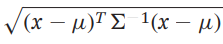

In [19]:
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()



In [20]:

x['mahala'] = mahalanobis(x=x, data=x)
x.head()

,label_1,label_2,mahala
0,70,7,2.031746
1,110,11,0.507937
2,80,8,0.888889
3,130,13,2.793651
4,120,7,7.111111


Assuming that the test statistic follows chi-square distributed with ‘n’ degree of freedom, the critical value at a 0.01 significance level and 2 degrees of freedom is computed as:

In [30]:
from scipy.stats import chi2
chi2.ppf((1-0.01), df=2)

9.21034037197618

In [31]:
x

,label_1,label_2,mahala
0,70,7,2.031746
1,110,11,0.507937
2,80,8,0.888889
3,130,13,2.793651
4,120,7,7.111111
5,80,8,0.888889
6,90,9,0.253968
7,100,10,0.126984
8,120,12,1.396825
